**Глава 1. Основы обработки изображений**

Навигация к соседним тетрадям:
<!--NAVIGATION-->
<[Глава 10. openCV](10_openCV.ipynb) | [Содержание](0_index.ipynb) | [Глава 2. Локальные дескрипторы изображений](2_local_image_descriptors.ipynb)>

<a href="https://colab.research.google.com/github/mualal/computer-vision-with-python/blob/master/notebooks/1_basic_image_handling_and_processing.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>

In [1]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from scipy import ndimage

In [2]:
try:
    import google.colab, sys
    !git clone https://github.com/mualal/computer-vision-with-python.git
    sys.path.append('computer-vision-with-python')
    %cd computer-vision-with-python
except:
    import sys
    sys.path.append('..')

In [3]:
import sys
current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from improlib import imtools, pca, rof

# PIL - библиотека Python Imaging Library

Содержит общие средства для обработки изображений и разнообразных полезных операций (изменение размера, кадрирование, поворот, преобразование цветов и т.д.)

In [4]:
pil_im = Image.open(os.path.join(parent_dir, 'images_input', 'Peterhof.jpg'))
pil_im.size

(4032, 3024)

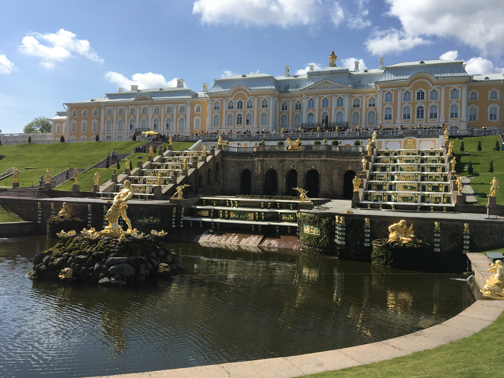

In [5]:
pil_im = pil_im.resize((504, 378))
pil_im

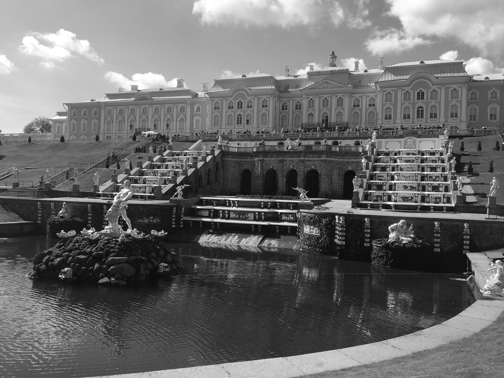

In [6]:
# метод convert() используется для преобразования цветов
pil_im_gray = Image.open(os.path.join(parent_dir, 'images_input', 'Peterhof.jpg')).resize((504, 378)).convert('L')
pil_im_gray

## Преобразование изображения в другой формат

In [7]:
input_dir = os.path.join(parent_dir, 'images_input')
files_name_list = ['Peterhof.jpg']
output_dir = os.path.join(parent_dir, 'images_output')

for file_name in files_name_list:
    input_file = os.path.join(input_dir, file_name)
    output_file = os.path.join(output_dir, file_name.split('.')[0] + '.png')
    try:
        Image.open(input_file).save(output_file)
    except IOError:
        print('Ошибка во время преобразования')


## Создание миниатюр

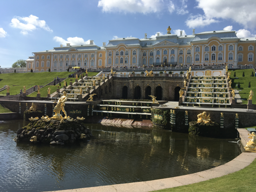

In [8]:
pil_im_thumbnail = pil_im.copy()
pil_im_thumbnail.thumbnail((256, 256))
pil_im_thumbnail

## Копирование и вставка областей

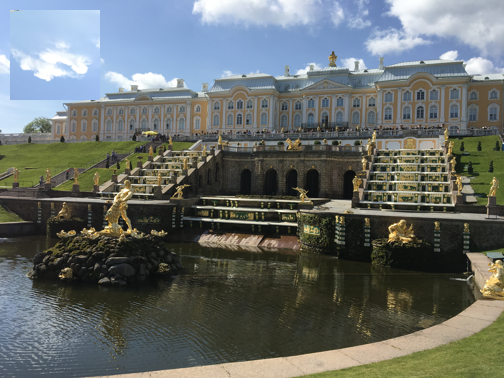

In [9]:
# задать координаты сторон прямоугольной области (в порядке: левая, верхняя, правая, нижняя)
box = (10, 10, 100, 100)
region = pil_im.crop(box)
region = region.transpose(Image.Transpose.ROTATE_180)
pil_im.paste(region, box)
pil_im

## Изменение размера и поворот

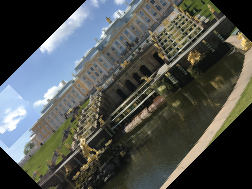

In [10]:
out = pil_im.resize((252, 189))
out = out.rotate(45)
out

# Библиотека Matplotlib

## Рисование точек и прямых линий

Text(0.5, 1.0, 'Петергоф')

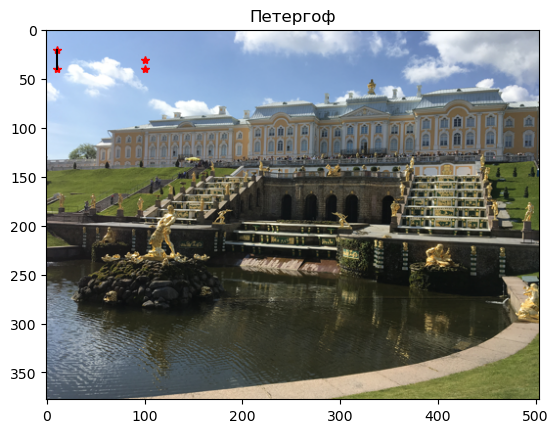

In [11]:
im = np.array(
    Image.open(
        os.path.join(parent_dir, 'images_input', 'Peterhof.jpg')
    ).resize((504, 378))
)
plt.imshow(im)
x = [10, 10, 100, 100]
y = [20, 40, 30, 40]
plt.plot(x, y, 'r*')
plt.plot(x[:2], y[:2],'black')
plt.title('Петергоф')

## Изолинии и гистограммы изображений

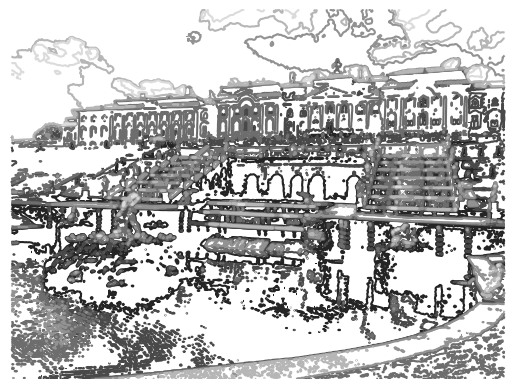

In [12]:
im = np.array(
    Image.open(
        os.path.join(
            parent_dir,
            'images_input',
            'Peterhof.jpg'
        )
    ).resize((504, 378)).convert('L')
)
plt.figure()
plt.gray()
plt.contour(im, origin='image')
plt.axis('equal')
plt.axis('off')
plt.show()

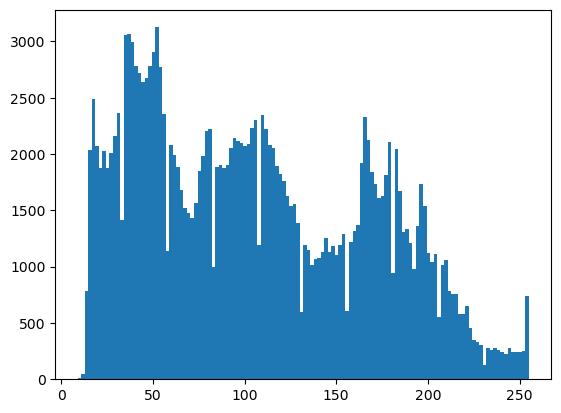

In [13]:
plt.figure()
plt.hist(im.flatten(), 128)
plt.show()

## Интерактивное аннотирование

# Пакет NumPy

## Представление изображения в виде массива

Изображения обычно кодируются 8-разрядными целыми без знака (uint8).

(378, 504) uint8


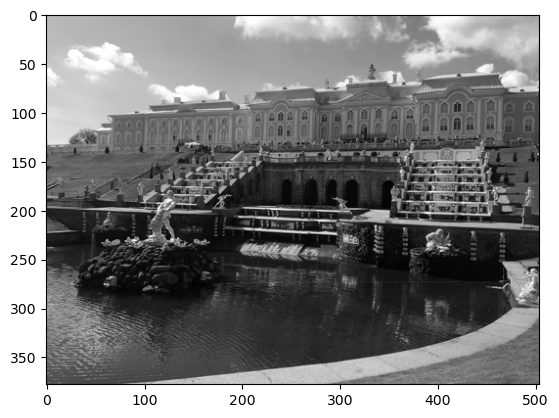

In [14]:
print(im.shape, im.dtype)

plt.imshow(im)
plt.show()

In [15]:
i = 3
j = 100
# скопировать значения из строки j в строку i
im[i, :] = im[j, :]
# присвоить всем элементам в столбце j значение 100
im[:, j] = 100
# просуммировать элементы в прямоугольнике, образованном
# первыми 100 строками и первыми 50 столбцами
im[:100, :50].sum()
# строки 50-100, столбцы 50-100 (сотые не включаются)
im[50:100, 50:100]
# среднее значение в строке i
im[i].mean()
# последний столбец
im[:, -1]
# предпоследняя строка
im[-2, :]
# предпоследняя строка
im[-2]
print('И много других способов работы с массивами...')

И много других способов работы с массивами...


## Преобразование уровня яркости

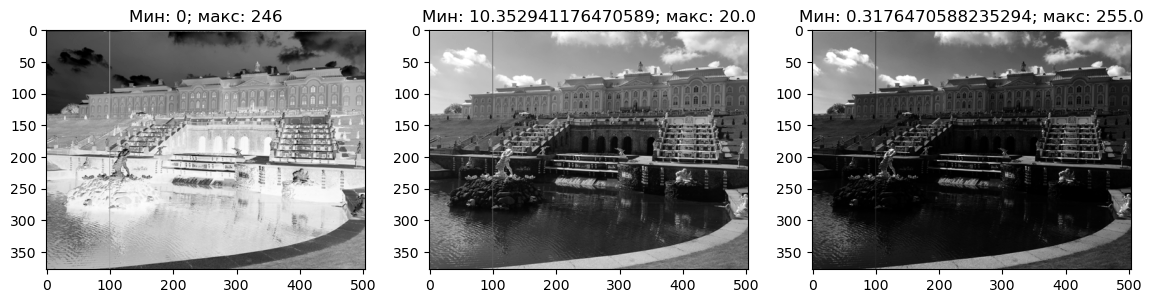

In [16]:
plt.figure(figsize=(14, 7))

# инвертировать уровни яркости
im2 = 255 - im
ax1 = plt.subplot(1, 3, 1)
plt.imshow(im2)
ax1.title.set_text(f'Мин: {im2.min()}; макс: {im2.max()}')

# привести к интервалу [10,20]
im3 = (10/255) * im + 10
ax2 = plt.subplot(1, 3, 2)
plt.imshow(im3)
ax2.title.set_text(f'Мин: {im3.min()}; макс: {im3.max()}')

# квадратичная функция для уменьшения значений
# более тёмных пикселей
im4 = 255 * (im / 255)**2
ax3 = plt.subplot(1, 3, 3)
plt.imshow(im4)
ax3.title.set_text(f'Мин: {im4.min()}; макс: {im4.max()}')

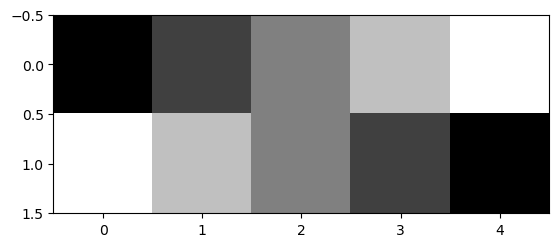

In [17]:
# функция fromarray() является обратной к np.array()
plt.imshow(Image.fromarray(np.uint8(Image.fromarray(np.uint8([[1,2,3,4,5],[5,4,3,2,1]])))))

## Выравнивание гистограммы

Изменяет гистограмму яркости так, чтобы результирующая гистограмма содержала все возможные значения яркости и при этом примерно в одинаковом количестве.

Часто применяется для нормировки яркости перед последующей обработкой, а также для повышения контрастности.

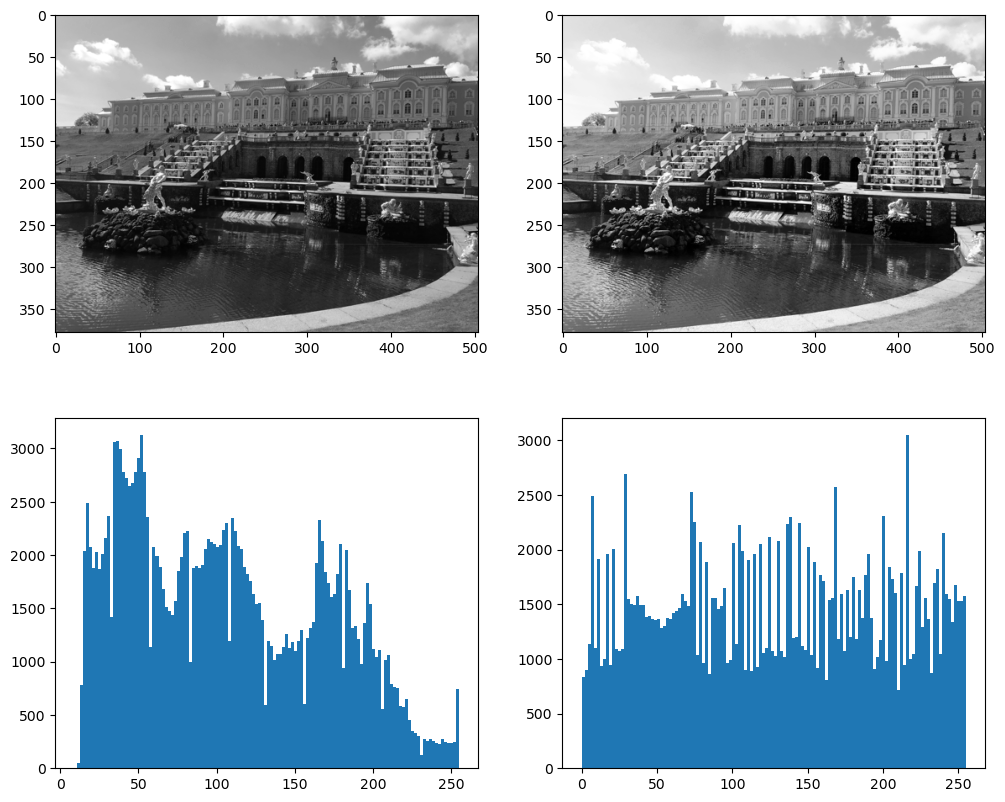

In [18]:
im = np.array(
    Image.open(os.path.join(parent_dir, 'images_input', 'Peterhof.jpg')
).resize((504, 378)).convert('L'))

im2, cdf = imtools.hist_equalization(im)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax0.imshow(im)
ax1.imshow(im2)
ax2.hist(im.flatten(), 128)
ax3.hist(im2.flatten(), 128)
plt.show()

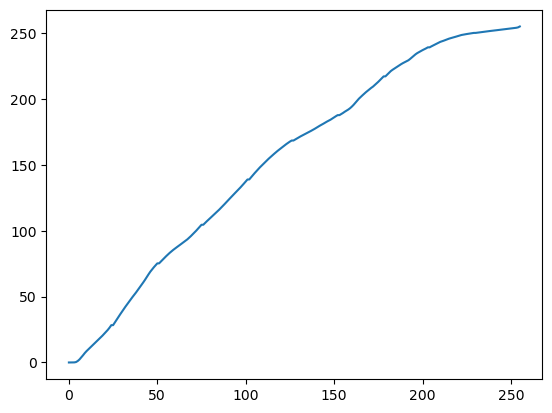

In [19]:
plt.plot(cdf)

## Усреденение изображений. Метод главных компонент для изображений

**Усреднение** позволяет уменьшить зашумлённость изображения. Используется для создания художественных эффектов.

**Метод главных компонент (PCA)** - полезная техника понижения размерности, оптимальная в том смысле, что представляет изменчивость обучающих данных, используя наименьшее возможное число измерений.

Матрицу проекции, получающуюся в результате применения метода PCA, можно рассматривать как переход к системе координат, в которой координаты упорядочены в порядке важности.

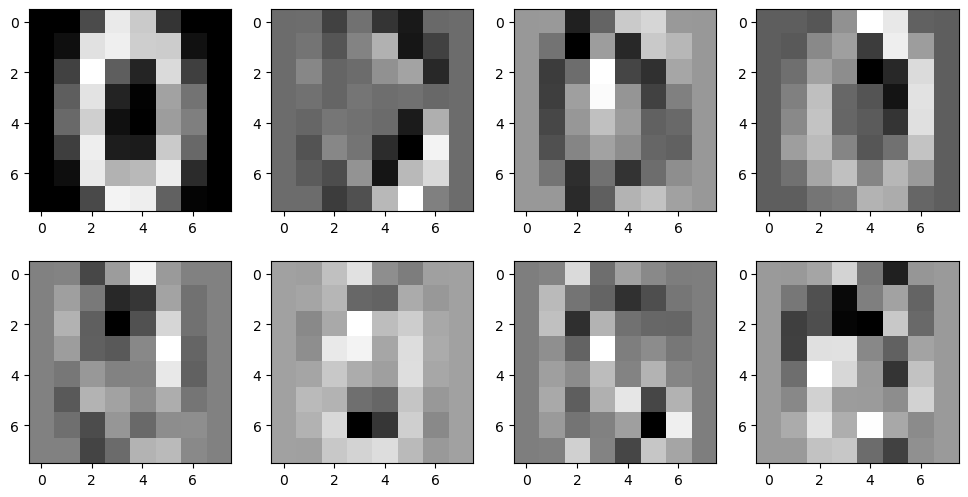

In [20]:
zeroes = load_digits(n_class=1)
immatrix = np.array([zero.flatten() for zero in zeroes.images], 'f')

V, S, immean = pca.pca(immatrix)
axs = [0] * 8
fig, ((axs[0], axs[1], axs[2], axs[3]), (axs[4], axs[5], axs[6], axs[7])) = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs[0].imshow(immean.reshape(zeroes.images[0].shape[0], zeroes.images[0].shape[1]))
for i in range(1,8):
    axs[i].imshow(V[i].reshape(zeroes.images[0].shape[0], zeroes.images[0].shape[1]))


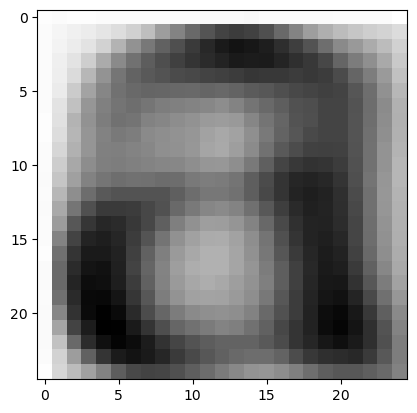

In [21]:
plt.imshow(imtools.image_averaging(imtools.get_imlist(os.path.join(input_dir, 'a_fonts'))))
plt.show()

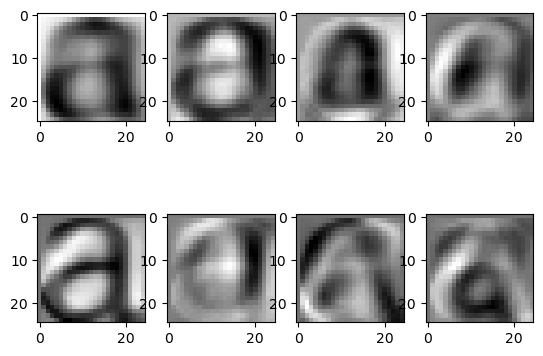

In [22]:
# вычислить среднее изображение и главные компоненты набора изображений буквы "а" разными шрифтами

# список с путями к изображениям
imlist = imtools.get_imlist(os.path.join(parent_dir, 'images_input', 'a_fonts'))

# открыть одно изображение для получения размера
im_example = np.array(Image.open(imlist[0]))
m, n = im_example.shape[0:2]

# собрать сглаженные изображения в матрицу (по одной строке
# на каждое изображение)
immatrix = np.array([np.array(Image.open(im)).flatten() for im in imlist], 'f')

# применить метод главных компонент
v, s, immean = pca.pca(immatrix)

# настрока показа изображений
plt.figure()
plt.gray()
plt.subplot(2, 4, 1)
plt.imshow(immean.reshape((m, n)))
for i in range(7):
    plt.subplot(2, 4, i+2)
    plt.imshow(v[i].reshape((m, n)))

# Пакет SciPy

Построен на базе NumPy. Включает эффективные функции для численного интегрирования, оптимизации, статистики, обработки сигналов, обработки изображений и т.п.

## Размытие изображений

**Гауссово размытие** = полутоновое изображение сворачивается с гауссовым ядром, в результате чего получается размытое изображение:

$$I_\sigma=I*G_\sigma$$

$*$ обозначает операцию свёртки, $G_\sigma$ - двумерное гауссово ядро со стандартным отклонением $\sigma$:

$$G_\sigma=\frac{1}{2\pi\sigma}\exp\left(-\frac{x^2+y^2}{2 \sigma^2}\right)$$

Гауссово размытие применяется для интерполяции, вычисления особых точек изображения и т.д.

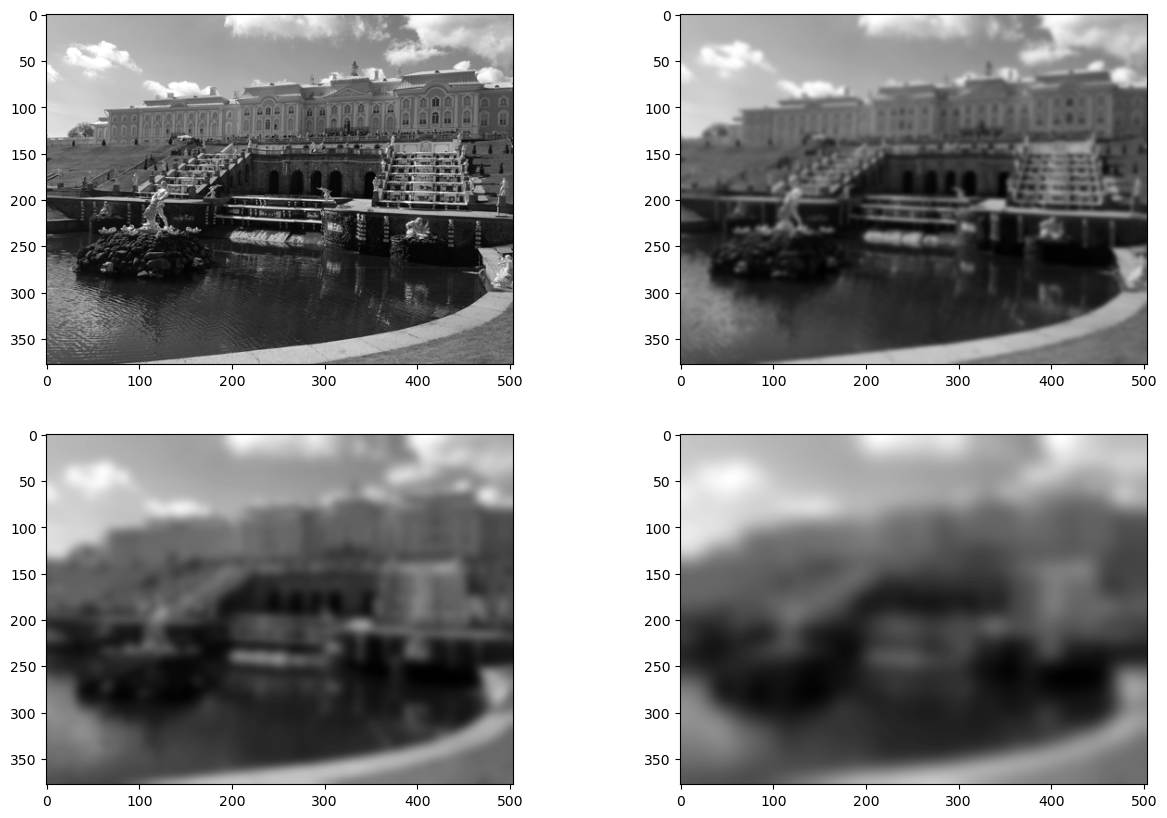

In [23]:
imgs = []
imgs.append(
    np.array(
        Image.open(os.path.join(parent_dir, 'images_input', 'Peterhof.jpg')
    ).convert('L'))
)
for sig in [2, 5, 10]:
    imgs.append(ndimage.gaussian_filter(im, sigma=sig))

plt.figure(figsize=(15, 10))
for i, im in enumerate(imgs):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(imtools.arr_resize(im, (504, 378)))
plt.show()

(3024, 4032, 3)


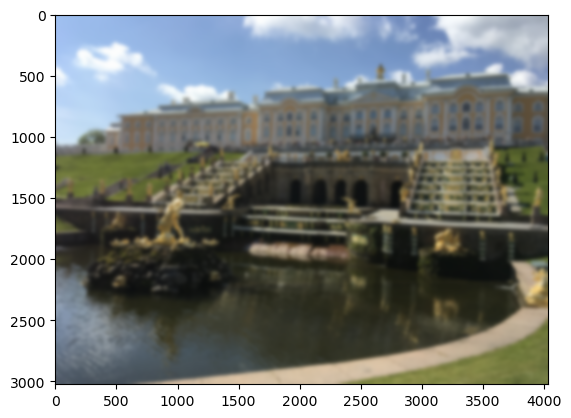

In [24]:
img = np.array(
    Image.open(os.path.join(parent_dir, 'images_input', 'Peterhof.jpg'))
)
print(img.shape)
img2 = np.zeros(img.shape)
for i in range(3):
    img2[:, :, i] = ndimage.gaussian_filter(img[:, :, i], sigma=15)
img2 = np.uint8(img2)
plt.imshow(img2)
plt.show()

## Производные изображения

Изменение яркости полутонового изображения $I$ описывается его производными $I_x$ и $I_y$ по $x$ и по $y$ (для цветных изображений производные берутся для каждого канала в отдельности).

**Градиент изображения**

$$\nabla I = \begin{pmatrix} I_x \\ I_y\end{pmatrix}$$

**Модуль градиента**

$$\left|\nabla I\right|=\sqrt{I_x^2+I_y^2}$$

описывает, насколько сильно изменяется яркость.

**Угол градиента** описывает направление наибольшего изменения яркости в каждой точке изображения.

Для вычисления производных изображения используют дискретные аппроксимации. Проще всего их реализуют в виде свёрток:

$$I_x=I*D_x\text{ и }I_y=I*D_y$$

В качестве $D_x$ и $D_y$ часто берут операторы Прюитта:

$$D_x=\begin{pmatrix}-1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1\end{pmatrix}; D_y=\begin{pmatrix}-1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1\end{pmatrix}$$

или операторы Собеля:

$$D_x=\begin{pmatrix}-1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1\end{pmatrix}; D_y=\begin{pmatrix}-1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1\end{pmatrix}$$

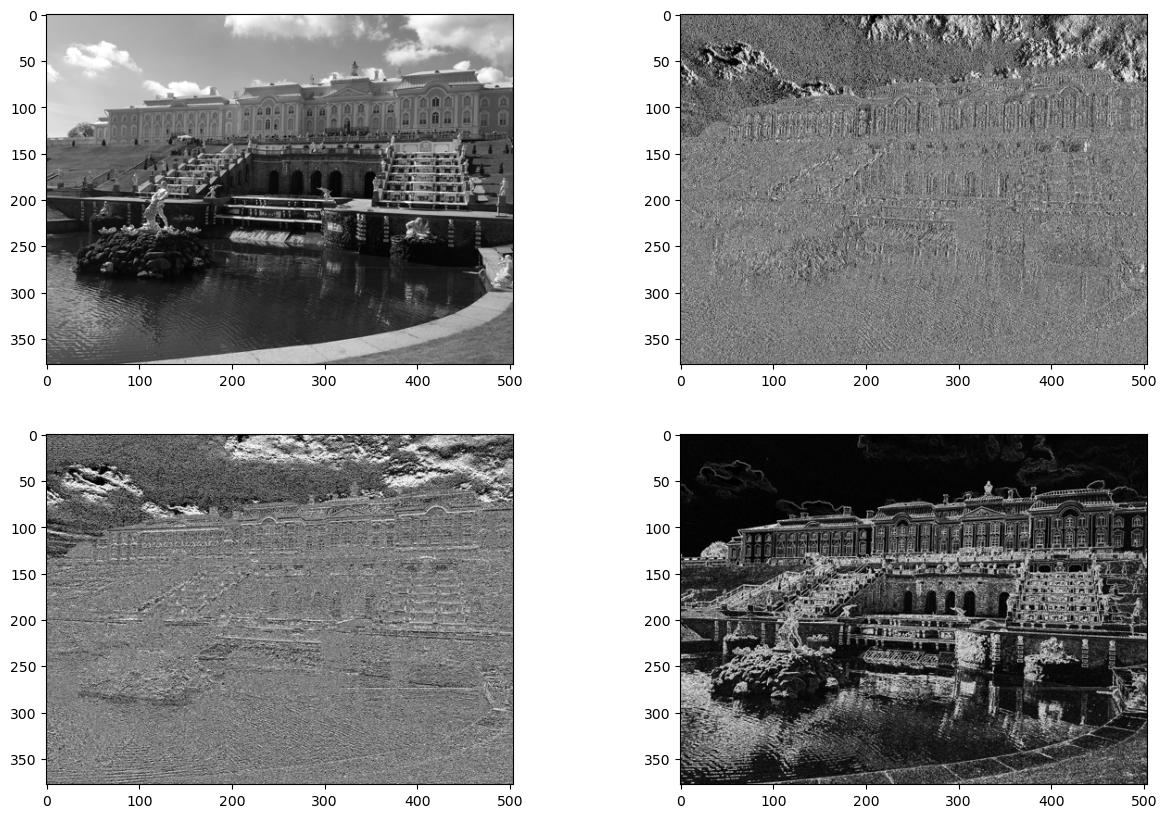

In [25]:
im = np.array(
    Image.open(
        os.path.join(parent_dir, 'images_input', 'Peterhof.jpg')
    ).convert('L')
)
imx = np.zeros(im.shape)
ndimage.sobel(im, 1, imx)

imy = np.zeros(im.shape)
ndimage.sobel(im, 0, imy)

magnitude = np.sqrt(imx**2 + imy**2)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(imtools.arr_resize(im, (504, 378)))
plt.subplot(2, 2, 2)
plt.imshow(imtools.arr_resize(imx, (504, 378)))
plt.subplot(2, 2, 3)
plt.imshow(imtools.arr_resize(imy, (504, 378)))
plt.subplot(2, 2, 4)
plt.imshow(imtools.arr_resize(magnitude, (504, 378)))


Есть недостаток: производные берутся в масштабе, определяемом разрешением изображения. Чтобы уменьшить зависимость от шума и вычислить производные в любом масштабе, используют фильтр Гаусса:

$$I_x=I*G_{\sigma x}\text{ и }I_y=I*G_{\sigma y},$$

где $G_{\sigma x}$ и $G_{\sigma y}$ - производные по $x$ и по $y$ гауссовой функции $G_{\sigma}$ со стандартным отклонением $\sigma$.

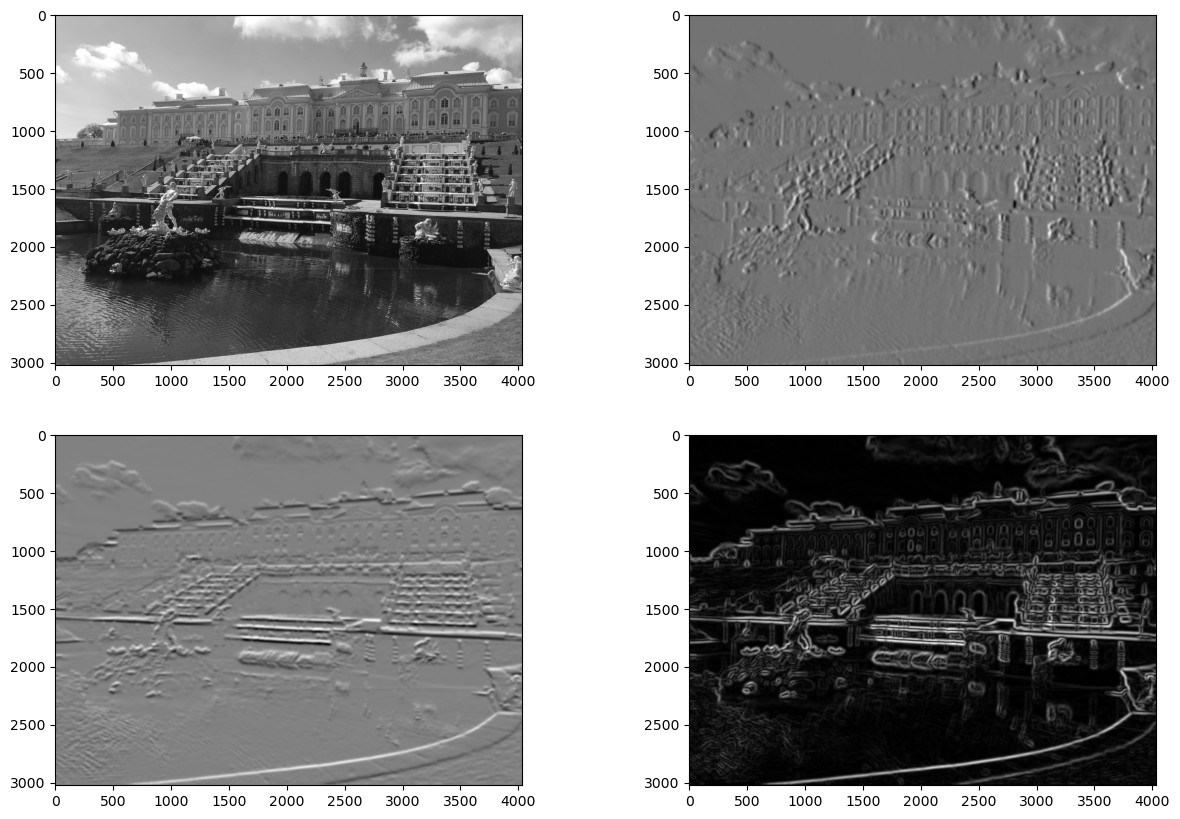

In [26]:
sigma = 10
imx = np.zeros(im.shape)
# третий аргумент определяет порядок производных в каждом направлении
ndimage.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

imy = np.zeros(im.shape)
# третий аргумент определяет порядок производных в каждом направлении
ndimage.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

magnitude = np.sqrt(imx**2 + imy**2)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.imshow(imx)
plt.subplot(2, 2, 3)
plt.imshow(imy)
plt.subplot(2, 2, 4)
plt.imshow(magnitude)

## Морфология. Подсчёт объектов

Морфология (математическая морфология) - это инфраструктура и набор методов обработки изображений с целью измерения и анализа базовых форм. Обычно применяется к бинарным изображениям.

Количество объектов:  45


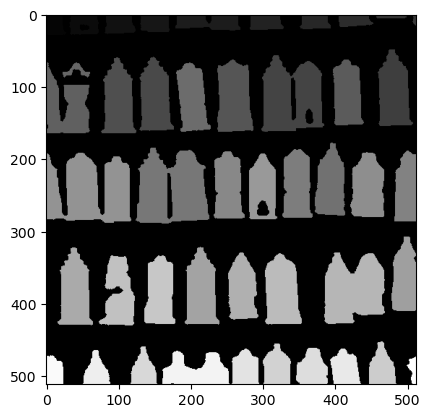

In [27]:
im = np.array(
    Image.open(
        os.path.join(parent_dir, 'images_input', 'houses.png')
    ).convert('L')
)
im = 1 * (im < 128)

labels, nbr_objects = ndimage.label(im)
print('Количество объектов: ', nbr_objects)

plt.imshow(labels)
plt.show()

Количество объектов:  48


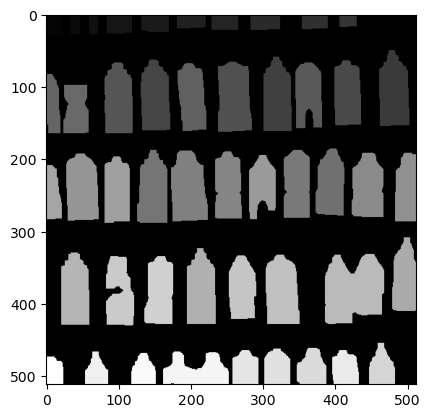

In [28]:
# морфология; операция бинарного открытия разделяет объекты (удаляет перемычки между объектами)
# второй аргумент определяет структурный элемент - массив, определяющий, каких соседей
# пикселя использовать (9 пикселей в направлении y: 4 сверху, сам пиксель и 4 снизу;
# и 5 пикселей в направлении x)
im_open = ndimage.binary_opening(im, np.ones((9, 5)), iterations=2)
labels, nbr_objects = ndimage.label(im_open)
print('Количество объектов: ', nbr_objects)

plt.imshow(labels)
plt.show()

# Более сложный пример: очистка изображения от шумов

Под очисткой от шумов понимается процесс удаления из изображения шума с сохранением всех деталей и общей структуры.

Используется для подчистки фотографий, повышения качества спутниковых снимков и т.д.

Будем использовать модель Рудина-Ошера-Фатеми (ROF). Она сглаживает изображение, сохраняя в то же время границы и структуры.

Решатель ROF будет реализован на базе алгоритма Шамболя.

Полной вариацией (total variation, TV) полутонового изображения $I$ называется сумма норм градиентов. В непрерывном представлении она имеет вид:

$$J(I)=\int\left|\nabla I\right|d\textbf{x}$$

А в дискретной форме:

$$J(I)=\sum_{\textbf{x}}\left|\nabla I\right|,$$

где суммирование производится по всем точкам изображения $\textbf{x}=(x,y)$.

В варианте модели ROF, предложенном Шамболем, целью является нахождение очищенного от шумов изображения $U$, для которого достигается минимум функции:

$$\min_{U}\left(\left|\left|I-U\right|\right|^2+2\lambda J(U)\right)$$

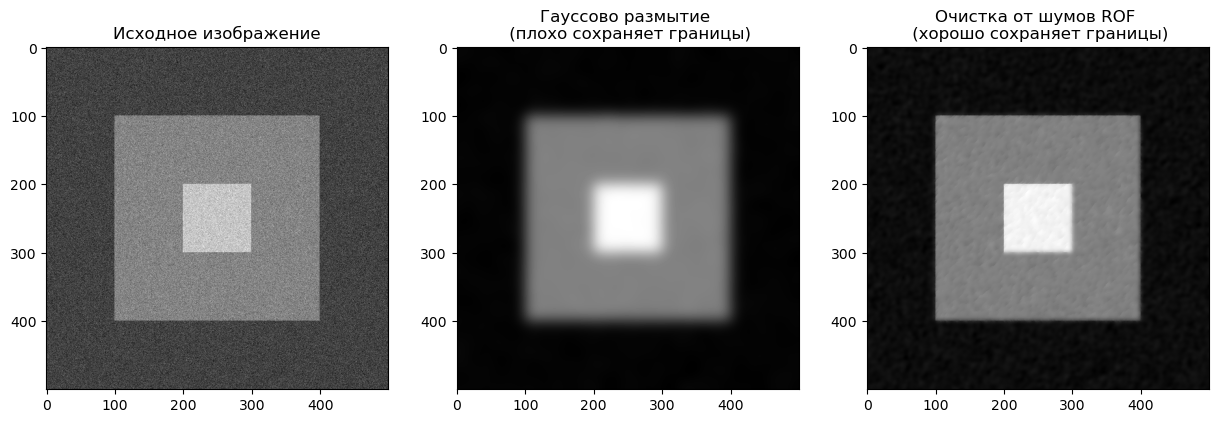

In [29]:
im = np.zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300] = 255
im = im + 30 * np.random.standard_normal((500, 500))

u, t = rof.denoise(im, im)
g = ndimage.gaussian_filter(im, 10)
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.imshow(im)
ax1.title.set_text('Исходное изображение')
ax2 = plt.subplot(1, 3, 2)
plt.imshow(g)
ax2.title.set_text('Гауссово размытие \n (плохо сохраняет границы)')
ax3 = plt.subplot(1, 3, 3)
plt.imshow(u)
ax3.title.set_text('Очистка от шумов ROF \n (хорошо сохраняет границы)')


<Figure size 640x480 with 0 Axes>

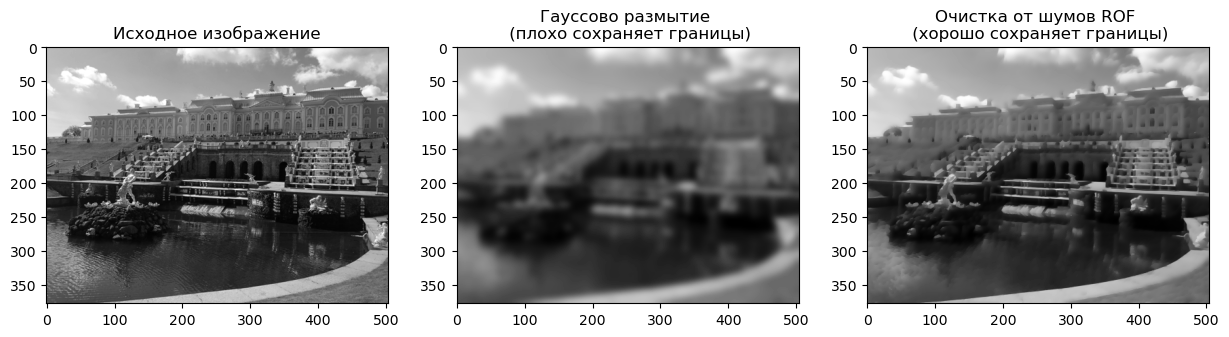

In [30]:
im = np.array(
    Image.open(
        os.path.join(parent_dir, 'images_input', 'Peterhof.jpg')
    ).resize((504, 378)).convert('L')
)

u, t = rof.denoise(im, im, tv_weight=25)
g = ndimage.gaussian_filter(im, 5)
plt.figure()

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 3, 1)
plt.imshow(im)
ax1.title.set_text('Исходное изображение')
ax2 = plt.subplot(1, 3, 2)
plt.imshow(g)
ax2.title.set_text('Гауссово размытие \n (плохо сохраняет границы)')
ax3 = plt.subplot(1, 3, 3)
plt.imshow(u)
ax3.title.set_text('Очистка от шумов ROF \n (хорошо сохраняет границы)')

<!--NAVIGATION-->
<[Глава 10. openCV](10_openCV.ipynb) | [Содержание](0_index.ipynb) | [Глава 2. Локальные дескрипторы изображений](2_local_image_descriptors.ipynb)>

<a href="https://colab.research.google.com/github/mualal/computer-vision-with-python/blob/master/notebooks/1_basic_image_handling_and_processing.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>